import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\pc\Desktop\DATASETS\diabetes.csv")

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.shape

(768, 9)

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### NaN

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Error Detection

<Axes: >

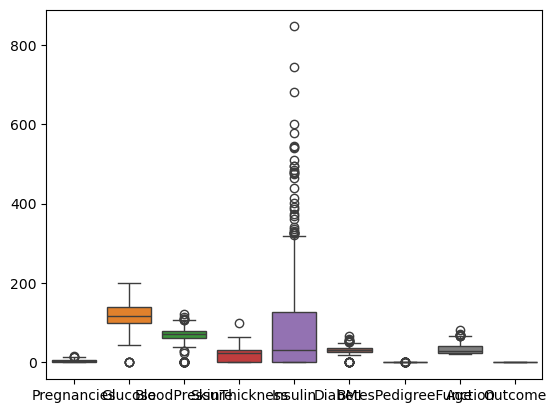

In [10]:
sns.boxplot(df)

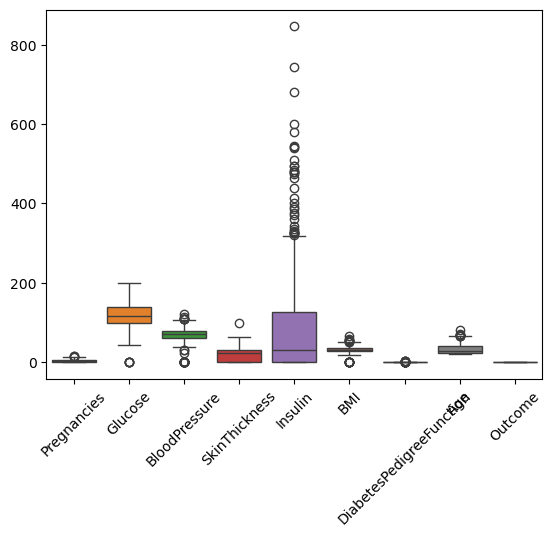

In [11]:
sns.boxplot(df)
plt.xticks(rotation = 45)
plt.show()


In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

In [14]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [15]:
import time


In [16]:
for c in cols :
    print(c)
    time.sleep(0.5)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [17]:
for c in cols :
    sk = df[c].skew().round()
    if sk == 0 or sk == -0 :
        print(c, ":Normal Distribution")

    else :
        print(c, ":skewed Distribution")
        
    time.sleep(1)

Pregnancies :skewed Distribution
Glucose :Normal Distribution
BloodPressure :skewed Distribution
SkinThickness :Normal Distribution
Insulin :skewed Distribution
BMI :Normal Distribution
DiabetesPedigreeFunction :skewed Distribution
Age :skewed Distribution


In [18]:
for c in cols :
    sk = df[c].skew().round()
    if sk == 0 or sk == -0 :
        m = df[c].mean()
        s = df[c].std()
        lower = m - 3* s
        upper = m + 3*s
        df[c] = df[c].map(lambda x : lower if x < lower else upper if x > upper else x )

    else :
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        up = q3 + (1.5 * iqr)
        df[c] = df[c].map(lambda x : low if x < low else up if x > up else x)
        
        


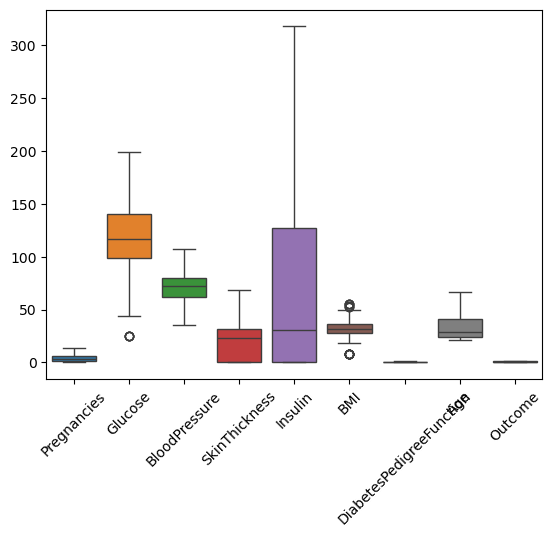

In [19]:
sns.boxplot(df)
plt.xticks(rotation = 45)
plt.show()

In [20]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [21]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


In [23]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome'>

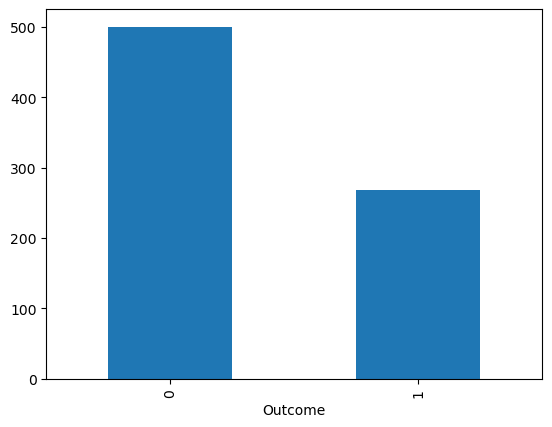

In [24]:
df['Outcome'].value_counts().plot(kind = "bar")

In [26]:
X = df.drop("Outcome" , axis = 1)

In [27]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [28]:
y = df["Outcome"]

In [29]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [30]:
from imblearn.over_sampling import RandomOverSampler

In [31]:
ros = RandomOverSampler()

In [32]:
ros

RandomOverSampler()

In [33]:
X_ros,y_ros = ros.fit_resample(X,y)

In [34]:
X.shape

(768, 8)

In [35]:
X_ros.shape

(1000, 8)

In [36]:
y_ros.shape

(1000,)

In [37]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [38]:
y_ros.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Outcome'>

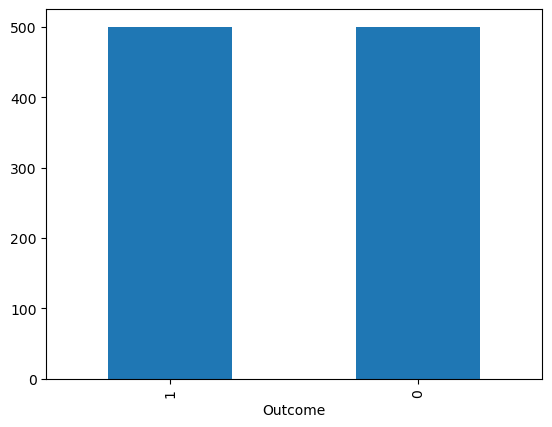

In [39]:
y_ros.value_counts().plot(kind = "bar")

### Splitting

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros, test_size = 0.20, random_state = 2)

In [42]:
X_train.shape

(800, 8)

In [43]:
X_test.shape

(200, 8)

In [44]:
y_train.shape

(800,)

In [45]:
y_test.shape

(200,)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtclass = DecisionTreeClassifier()

In [48]:
dtclass

DecisionTreeClassifier()

In [49]:
dtclass.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
dtclass.score(X_test,y_test)

0.8

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [53]:
knn = KNeighborsClassifier()

In [54]:
sv_model = SVC()

In [55]:
dtree = DecisionTreeClassifier()

In [56]:
models = [knn,sv_model,dtree]


In [57]:
models

[KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]

In [58]:
for m in models :
    m.fit(X_train,y_train)
    sc = m.score(X_test,y_test)
    print(m,end = "==>")
    print(sc)
    

KNeighborsClassifier()==>0.75
SVC()==>0.745
DecisionTreeClassifier()==>0.805


### Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score


In [60]:
dt1 = DecisionTreeClassifier()

In [61]:
dt1

DecisionTreeClassifier()

In [67]:
score = cross_val_score(dt1, X_ros, y_ros, cv = 20, n_jobs = -1)

In [68]:
score

array([0.74, 0.8 , 0.9 , 0.82, 0.88, 0.74, 0.78, 0.76, 0.8 , 0.86, 0.84,
       0.92, 0.86, 0.94, 0.92, 0.9 , 0.9 , 0.86, 0.88, 0.94])

In [69]:
score.mean()

0.8520000000000001